<a href="https://colab.research.google.com/github/luoChengwen/Accelerometer_integration/blob/master/Housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

housing price:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [0]:
train = pd.read_csv('/gdrive/My Drive/Kaggle/housing_price/train.csv')
test = pd.read_csv('/gdrive/My Drive/Kaggle/housing_price/test.csv')

In [5]:
print(np.shape(train))
missing_values = train.isnull().sum()[train.isnull().sum()>0]
type(missing_values)
print(missing_values.sort_values(ascending=False).head(10))

(1460, 81)
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
dtype: int64


In [0]:
def checkpattern(df,columns_):
    for i in columns_:
        to_check = df.dropna(subset=[i])
#         print(pd.crosstab(df[i],df.SalePrice))
        print(train['SalePrice'].mean(), to_check['SalePrice'].mean())


In [7]:
print(checkpattern(train,['PoolQC','MiscFeature', 'Alley', 'Fence']))
print(np.shape(train))
# train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

180921.19589041095 288138.5714285714
180921.19589041095 151623.94444444444
180921.19589041095 142845.9120879121
180921.19589041095 152912.00711743772
None
(1460, 81)


In [8]:
train[['PoolQC']] = train[['PoolQC']].fillna('None')
print(np.shape(train))

(1460, 81)


In [9]:
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False).head(5)

MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
dtype: int64

In [10]:
def highlight(value):
    if value >= 0.5:
        style = 'background-color: palegreen'
    else:
        style = 'background-color: pink'
    return style

pd.pivot_table(train, values='SalePrice', index=['Alley'], columns='Fence').style.applymap(highlight)


Fence,GdPrv,GdWo,MnPrv,MnWw
Alley,,,,
Grvl,127133,130500,137438,110000
Pave,182250,153500,40000,nan


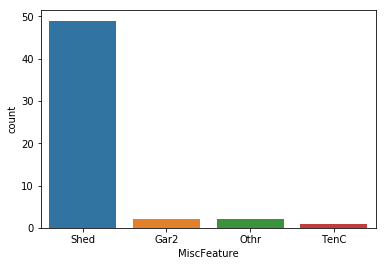

In [11]:
sb.countplot(train.MiscFeature)

In [12]:
for i in ['Shed', 'Gar2','Othr','TenC']:
    print(train[train.MiscFeature == i].SalePrice.mean())

train[['MiscFeature']] = train[['MiscFeature']].fillna('Shed')

151187.61224489796
170750.0
94000.0
250000.0


178927.45762711865
148751.0891719745
134286.36363636365
140379.3148148148


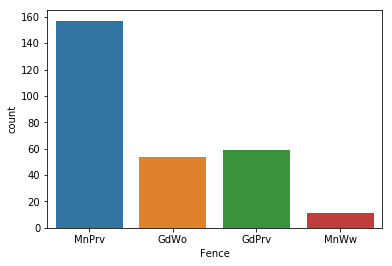

In [13]:
for i in list(set(train.Fence.dropna())):
    print(train[train.Fence == i].SalePrice.mean())
sb.countplot(train.Fence)

train = train.drop(columns=['Alley','Fence'])

In [0]:
import copy
traino = copy.deepcopy(train)

def fill_nas(df):
    for i in df.columns:
        if df[i].dtype == 'O':
            df[i] = df[[i]].fillna(df[i].mode()[0])
        else:
            df[i] = df[[i]].fillna(df[i].median())
    return df

train_fillna = fill_nas(train)


In [15]:
# check for null value
naval = train_fillna.isnull().sum()
sum(naval>0)


0

In [16]:
for_comb = train_fillna.drop(columns=['SalePrice'])

test_f = test[list(for_comb.columns)]
print(for_comb.columns == test_f.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [17]:

print(np.shape(train), np.shape(test))
train_test_comb = pd.concat([for_comb,test_f],axis=0)
print(np.shape(train_test_comb))
train_test_comb = fill_nas(train_test_comb)

(1460, 79) (1459, 80)
(2919, 78)


In [18]:
print(set(train_test_comb.FullBath))
print(set(train.FullBath))
set(test.FullBath)


{0, 1, 2, 3, 4}
{0, 1, 2, 3}


{0, 1, 2, 3, 4}

In [0]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy import stats


def scaler(df,df_all):   
    normality_violated = []
    
    for i in df.columns:
        if df[i].dtypes == 'O':
            le = LabelEncoder()
            lex = le.fit(np.array(df_all[i]).reshape(-1,1))
            df[i] = lex.transform(np.array(df[i]).reshape(-1,1))
            
        elif i not in ['SalePrice','Id']:
            k2, p  = stats.normaltest((np.array(df[i]).reshape(-1,1)))
            if p <.05 :
                normality_violated.append(i)  
        else:
            pass
    
    return df, normality_violated
            

In [0]:
import warnings
warnings.simplefilter('ignore')

In [21]:
train2, normality_violation = scaler(train_fillna,train_test_comb)
print(normality_violation[:5])
print(len(normality_violation))
print(len(train_fillna), len(train2))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
36
1460 1460


(1460, 79)


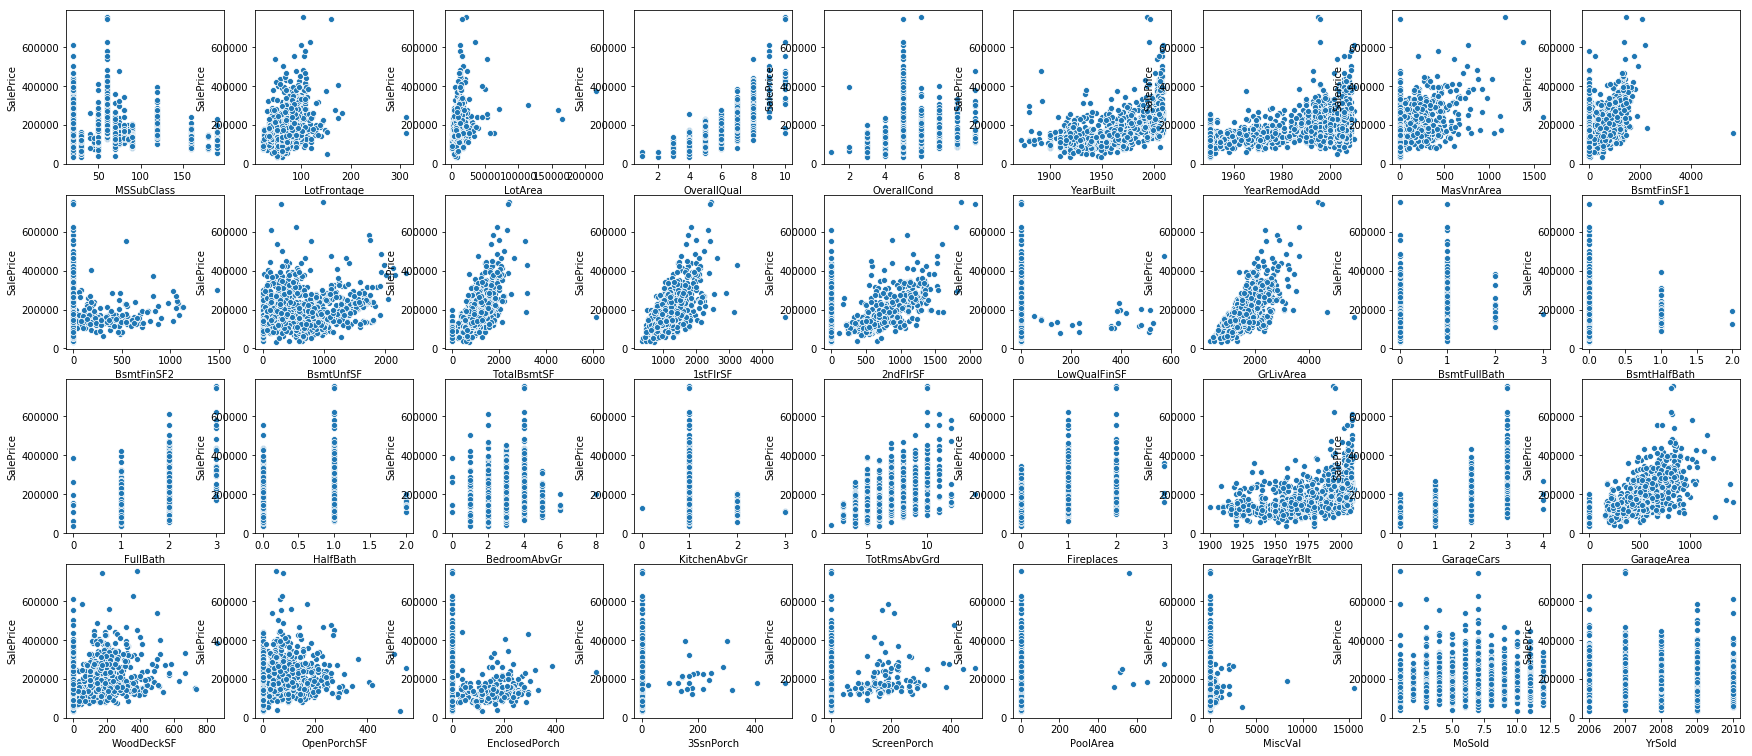

In [22]:
print(np.shape(train2))
gs = gridspec.GridSpec(9, 9)
fig = plt.figure(figsize=(30,30))
for i,j in zip(range(77),normality_violation):
    ax = fig.add_subplot(gs[i])  
    sb.scatterplot(x = j ,y = 'SalePrice', data = train2)
    

# for i in train2.columns:
#     sb.lineplot(x = i, y = 'SalePrice', data =train2)

In [23]:

# print(pd.pivot_table(train2, values= 'SalePrice', index = ['FullBath','HalfBath'])) 

from sklearn.preprocessing import OneHotEncoder

def turn_string(df):
    df['YrSold'] = pd.Series(str(i) for i in df['YrSold'])
    df['FullBath'] = pd.Series(str(i) for i in df['FullBath'])
    df['HalfBath'] = pd.Series(str(i) for i in df['HalfBath'])
    return df
train_test_comb = turn_string(train_test_comb)

def year_bath_encode(df, train_test_comb):
    onehot = OneHotEncoder()
  
    train_test_comb2 = train_test_comb.append(train_test_comb.iloc[-1,:], ignore_index = True)
    train_test_comb2.loc[len(train_test_comb)-1,'FullBath'] = 4
    encoder = onehot.fit(train_test_comb2[['YrSold','FullBath','HalfBath']])
    
    print(np.shape(df))    
    df2 = encoder.transform(df[['YrSold','FullBath','HalfBath']]).toarray()
      
    colname = encoder.get_feature_names()
    print(colname, np.shape(df2))
    df3 = pd.DataFrame(df2, columns = colname)
    df4 = pd.concat([df,df3],axis=1)
    df4 = df4.drop(columns = ['YrSold','FullBath','HalfBath'])
    return df4
    

train3 = year_bath_encode(train2,train_test_comb)

train3.columns
print(set(train2['YrSold']),set(train2['FullBath']),set(train2['HalfBath']))

(1460, 79)
['x0_2006.0' 'x0_2007.0' 'x0_2008.0' 'x0_2009.0' 'x0_2010.0' 'x1_0.0'
 'x1_1.0' 'x1_2.0' 'x1_3.0' 'x1_4.0' 'x2_0.0' 'x2_1.0' 'x2_2.0'] (1460, 13)
{2006, 2007, 2008, 2009, 2010} {0, 1, 2, 3} {0, 1, 2}


In [24]:
train3.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '

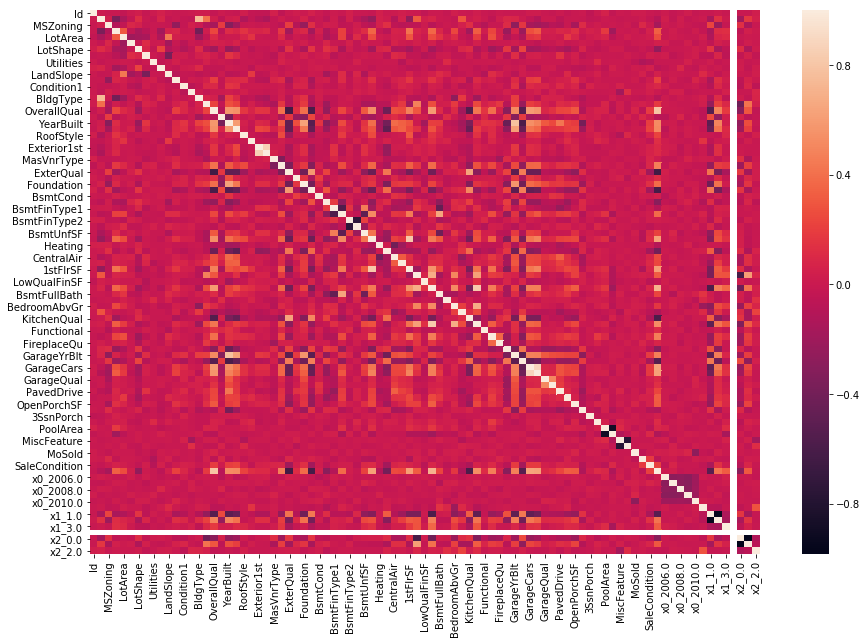

In [25]:
plt.figure(figsize=(15,10))
sb.heatmap(train3.corr())

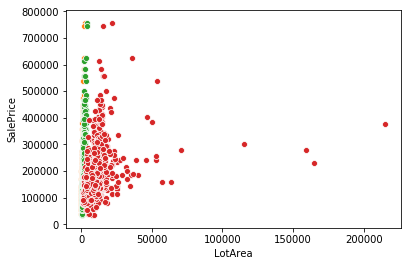

In [26]:
sb.scatterplot('1stFlrSF','SalePrice', data= train3)
sb.scatterplot('TotalBsmtSF','SalePrice', data= train3)
sb.scatterplot('GrLivArea','SalePrice', data= train3)
sb.scatterplot('LotArea','SalePrice', data= train3)

(1460, 89)
(1422, 89)


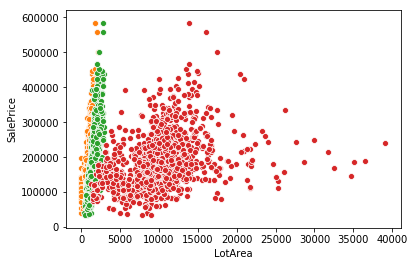

In [27]:

def remove_outlier(df):
    print(np.shape(df))
    m = np.nanmean(df['1stFlrSF'])
    std = np.nanstd(df['1stFlrSF'])
    df = df[df['1stFlrSF'] <= m+std*3]
    
    m2 = np.nanmean(df['TotalBsmtSF'])
    std2 = np.nanstd(df['TotalBsmtSF'])
    df = df[df['TotalBsmtSF'] <= m2+std2*3]
    
    m3 = np.nanmean(df['GrLivArea'])
    std3 = np.nanstd(df['GrLivArea'])
    df = df[df['GrLivArea'] <= m3+std3*3]
    
    m4 = np.nanmean(df['LotArea'])
    std4 = np.nanstd(df['LotArea'])
    df = df[df['LotArea'] <= m4+std4*3]
    
    print(np.shape(df))
    return df

train4 = remove_outlier(train3)
sb.scatterplot('1stFlrSF','SalePrice', data= train4)
sb.scatterplot('TotalBsmtSF','SalePrice', data= train4)
sb.scatterplot('GrLivArea','SalePrice', data= train4)
sb.scatterplot('LotArea','SalePrice', data= train4)


In [0]:
train4.columns
X = train4.drop(columns=['Id','SalePrice'])
y = train4[['SalePrice']]
# print(X.columns)
from sklearn.decomposition import PCA

def PCA_f(df,n): 
    pca = PCA(n_components=n, svd_solver = 'auto')
    X_pca = pca.fit(df)
    X2_2 = X_pca.transform(df)
    np.shape(X2_2)
    print(X_pca.explained_variance_ratio_)  
    return X2_2

## Model 1: simple Linear/ Lasso Regression

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


X2 = PCA_f(X,1)
rg = LinearRegression(normalize=True, n_jobs=2)
rg.fit(X2,y)
print(rg.score(X2,y))


lasso = Lasso()
lasso.fit(X,y)
print(lasso.score(X,y))

[0.92845884]
0.129192562790724
0.9070535717280729


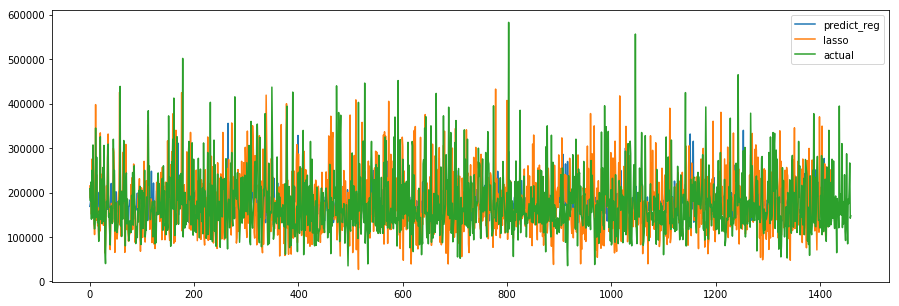

In [30]:
plt.figure(figsize=[15,5])
plt.plot(rg.predict(X2))
plt.plot(lasso.predict(X))
plt.plot(y)
plt.legend(['predict_reg','lasso','actual'])

In [31]:
testid = test['Id']
test[['PoolQC']] = test[['PoolQC']].fillna('None')
test[['MiscFeature']] = test[['MiscFeature']].fillna('Shed')
test_X = test.drop(columns=['Id','Alley', 'Fence'])
test2 = fill_nas(test_X)
print(len(test2.columns))
print(len(train_test_comb.columns))
set(test2.columns)- set(train_test_comb.columns)

77
78


set()

In [32]:
test3, normality_t = scaler(test2,train_test_comb)
test4 = turn_string(test3)
test5 = year_bath_encode(test4,train_test_comb)
# test6 = remove_outlier(test5)
test6 = PCA_f(test5,1)

# print(set(test3['YrSold']))
# print(set(test3['FullBath']))
# print(set(test3['HalfBath']))

(1459, 77)
['x0_2006.0' 'x0_2007.0' 'x0_2008.0' 'x0_2009.0' 'x0_2010.0' 'x1_0.0'
 'x1_1.0' 'x1_2.0' 'x1_3.0' 'x1_4.0' 'x2_0.0' 'x2_1.0' 'x2_2.0'] (1459, 13)
[0.93891408]


In [0]:

y_pred = rg.predict(test6)
y_lass = lasso.predict(test5)


1459 1459 1459


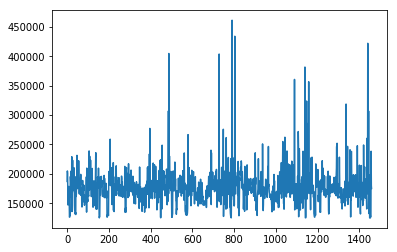

In [34]:
plt.plot(y_pred)
print(len(test6),len(test),len(test6))


In [35]:
testId = pd.DataFrame(testid,columns=['Id']).applymap(lambda x: np.round(x,0))
print(testId.head())
predictions = pd.DataFrame(y_pred,columns=['SalePrice'])

predictions2 = pd.DataFrame(y_lass,columns=['SalePrice'])


     Id
0  1461
1  1462
2  1463
3  1464
4  1465


In [36]:
output = testId.merge(predictions,left_index=True, right_index = True)
print(output.head())
output.to_csv('/content/sample_data/linear_reg.csv',index=False)
print(len(output))
output2 = testId.merge(predictions2,left_index=True, right_index = True)
output2.to_csv('/content/sample_data/lasso_reg.csv',index=False)

     Id      SalePrice
0  1461  187070.137266
1  1462  204857.094468
2  1463  200703.347290
3  1464  177221.103039
4  1465  146976.101536
1459


## lasso alone provided .19 loss on leaderboard, and linear reg lead to a much larger loss, around .41. The lowest loss on leaderboard is around .06

## KNN test

In [37]:

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto',metric='minkowski')
knn.fit(X,y)
print(knn.score(X,y))
pred3 = pd.DataFrame(knn.predict(test5),columns=['SalePrice'])
output3 = testId.merge(pred3,left_index=True, right_index = True)
print(output3.head())
output3.to_csv('/content/sample_data/knn_reg.csv',index=False)

0.8053509784254879
     Id  SalePrice
0  1461   150340.0
1  1462   205680.0
2  1463   174360.0
3  1464   193900.0
4  1465   147976.0


## knn alone, without gridsearch cv lead to .24 loss on leaderboard

## XGBOOST test

In [0]:
from xgboost import XGBRegressor


In [39]:
xgb = XGBRegressor()
xgb.fit(X,y)
xgb.score(X,y)

[04:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9594572275320523

In [40]:
pred4 = pd.DataFrame(xgb.predict(test5),columns=['SalePrice'])

output4 = testId.merge(pred4,left_index=True, right_index = True)
print(output3.head())
output4.to_csv('/content/sample_data/xgb.csv',index=False)

     Id  SalePrice
0  1461   150340.0
1  1462   205680.0
2  1463   174360.0
3  1464   193900.0
4  1465   147976.0


## xgb alone lead to .139 loss on leaderboard ~ smaller than lasso, let's try stacking next 

## stacking

In [0]:
from mlxtend.regressor import StackingRegressor
from sklearn import model_selection
from sklearn import svm
import warnings

In [42]:
# svrs = svm.SVR()
from sklearn.linear_model import Ridge
rdg = Ridge()
stregr = StackingRegressor(regressors=[lasso, knn ,xgb], 
                           meta_regressor=rdg)

for clf, label in zip([lasso, knn ,xgb, stregr], ['Lasso','KNN','XGB',' stakcing Classifier1']):
                      scores = model_selection.cross_val_score(clf,X ,y, cv=5, scoring = 'r2')
                      print(np.round(scores.mean(),3),np.round(scores.std(),3),label)



stregr.fit(X,y)
stregr

0.884 0.017 Lasso
0.686 0.014 KNN
[04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.903 0.018 XGB
[04:04:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:53] WARNING: /workspace/src/objective/regression_obj.c

StackingRegressor(meta_regressor=Ridge(alpha=1.0, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=False, random_state=None,
                                       solver='auto', tol=0.001),
                  refit=True,
                  regressors=[Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                    max_iter=1000, normalize=False,
                                    positive=False, precompute=False,
                                    random_state=None, selection='cyclic',
                                    tol=0.0001, warm_start=False)...
                                           colsample_bytree=1, gamma=0,
                                           importance_type='gain',
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                   

In [43]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [44]:



pred5 = pd.DataFrame(stregr.predict(test5),columns=['SalePrice'])
output5 = testId.merge(pred5,left_index=True, right_index = True)
print(output5.head())
output5.to_csv('/content/sample_data/stacking.csv',index=False)




     Id      SalePrice
0  1461  128817.271372
1  1462  165395.167333
2  1463  178938.720961
3  1464  184408.024055
4  1465  191691.889237


In [0]:
outfinal = (output3 + output2 + output4 + output5)/4

In [0]:

y1 = lasso.predict(X)
y2 = knn.predict(X).reshape(-1,)
y3 = xgb.predict(X)
y4 = stregr.predict(X).reshape(-1,)


In [47]:
print(np.shape(y1),np.shape(y2),np.shape(y3),np.shape(y4))

(1422,) (1422,) (1422,) (1422,)


In [48]:
np.shape(y1+y2+y3+y4)

(1422,)

In [0]:
y_final =( y1+y2+y3+y4)/4

In [50]:
pred_mean = pd.DataFrame(y_final,columns=['SalePrice'])
output_mean = testId.merge(pred_mean,left_index=True, right_index = True)
print(output_mean.head())
output_mean.to_csv('/content/sample_data/output_mean.csv',index=False)

     Id      SalePrice
0  1461  207385.504299
1  1462  169415.437366
2  1463  213708.766076
3  1464  165387.672346
4  1465  276854.158196


In [0]:
def my_custom_loss_func(y_true, y_pred):
    diff = abs(y_true - y_pred)
    return diff.sum()

In [0]:
a= np.array([1,2,3])
b = np.array([4,2,2])

In [53]:
my_custom_loss_func(a,b)

10

In [56]:
for i in [y1,y2,y3,y4,y_final]:
    print(my_custom_loss_func(i, y_pred))

119078239180.77919
103841564718.66212
115877048113.37433
117531289096.90623
112303490493.57602
